## Tasks


- Unduh dataset yang akan dipakai [disini](https://www.kaggle.com/karangadiya/fifa19).
- Buatlah visualisasi dengan data tersebut dengan
menggunakan Matplotlib, adapun jenis visualisasinya
berupa:
    - Bar Plot
    - Histogram
    - Pie Chart
     - Scatter Plot
     - Box Plot
    - Maps dengan Folium

## Data Info

**Context**

Football analytics

**Content**
Detailed attributes for every player registered in the latest edition of FIFA 19 database.
Scraping code at GitHub repo: https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019

**Acknowledgements**
Data scraped from https://sofifa.com/

**Inspiration**
Inspired from this dataset: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset

**About this file**

data.csv includes lastest edition FIFA 2019 players attributes like Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause.

## Download Dataset

Before starting, you need to have the opendatasets library installed in your system.

In [249]:
!pip install opendatasets --q

In [250]:
import opendatasets as od

The dataset can now be downloaded using od.download. When you execute od.download, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

In [251]:
dataset_url = 'https://www.kaggle.com/karangadiya/fifa19'

In [252]:
od.download(dataset_url)

Skipping, found downloaded files in ".\fifa19" (use force=True to force download)


## Import Library

In [253]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Let's load the data from ./fifa19/data.csv using Pandas.

In [254]:
data_fifa19 = pd.read_csv('./fifa19/data.csv')

#for printing all (string-)content in a cell:
#print five top data
pd.set_option('display.max_colwidth', None)
data_fifa19.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Data Cleaning

### Handling Missing Values

In [255]:
data_fifa19.shape

(18207, 89)

In [256]:
data_fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [257]:
data_fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [258]:
data_fifa19.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

48 is repeating many times lets check if all of them are same ID or not

In [259]:
missing_height = data_fifa19[data_fifa19['Height'].isnull()].index.tolist()
missing_weight = data_fifa19[data_fifa19['Weight'].isnull()].index.tolist()

In [260]:
if missing_height == missing_weight:
  print('They are same')
else:
  print('They are different')

They are same


As they are same I am assuming it will be same for other all columns too.

We will see it soon.

In [261]:
df = data_fifa19.drop(data_fifa19.index[missing_height])

In [262]:
df.shape

(18159, 89)

In [263]:
df.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                       0
Position                       12
Jersey Number                  12
Joined                       1505
Loaned From                 16895
Contract Valid Until          241
Height                          0
Weight                          0
LS                           2037
ST            

Kita akan drop columns yang tidak akan kita gunakan

In [264]:
df = df.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club','Club Logo', 'Special', 'Preferred Foot', 'Weak Foot', 'Work Rate', 'Body Type',
'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'], axis=1)

In [265]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Value                       0
Wage                        0
International Reputation    0
Skill Moves                 0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Intercepti

In [266]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,International Reputation,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,€110.5M,€565K,5.0,4.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,€77M,€405K,5.0,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,€118.5M,€290K,5.0,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,€72M,€260K,4.0,1.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,€102M,€355K,4.0,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [267]:
#Cleaning some of values so that we can interpret them

def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        print(value)
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

In [268]:
df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

110.5
77.0
118.5
72.0
102.0
93.0
67.0
80.0
51.0
68.0
77.0
76.5
44.0
60.0
63.0
89.0
83.5
78.0
58.0
53.5
51.5
60.0
38.0
64.5
27.0
81.0
69.5
59.5
69.5
62.0
73.5
73.5
69.5
59.0
46.0
43.0
60.0
36.0
57.0
24.0
30.0
4.0
57.0
64.5
51.0
64.0
30.5
62.5
52.0
38.0
45.0
34.0
46.5
46.5
34.0
61.0
59.5
41.5
52.0
44.5
56.5
53.0
50.0
55.0
36.5
46.5
45.0
45.5
43.5
35.0
30.0
39.0
44.0
30.0
43.5
18.0
21.5
46.5
50.5
54.0
50.0
36.5
40.5
50.5
40.5
38.0
45.0
45.0
37.5
28.5
37.0
37.0
32.0
37.5
39.0
30.0
26.0
37.5
30.5
33.0
38.5
35.5
9.0
26.0
15.5
37.0
21.5
22.0
9.0
14.0
34.0
34.0
32.0
34.0
40.5
36.5
42.5
42.5
34.0
35.5
31.5
38.0
39.0
31.5
42.0
37.0
25.0
31.5
29.5
29.5
30.0
27.0
24.0
22.0
31.0
24.5
32.0
27.5
29.5
25.0
30.5
24.0
29.0
24.0
27.5
16.5
23.0
19.0
25.0
19.0
18.0
30.0
4.2
15.5
15.5
40.0
41.0
28.0
22.5
28.5
30.5
34.0
34.0
35.5
34.0
29.5
36.5
34.5
33.0
34.0
30.5
32.5
27.0
33.0
32.0
20.0
35.0
28.5
30.0
34.5
25.0
26.0
28.5
33.0
32.5
31.5
31.0
27.0
24.5
24.0
26.5
19.0
26.5
30.5
25.5
26.5
21.0
21.0
21.0
25.5
2

In [269]:
df.head().T

,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Value,110500000.0,77000000.0,118500000.0,72000000.0,102000000.0
Wage,565000.0,405000.0,290000.0,260000.0,355000.0
International Reputation,5.0,5.0,5.0,4.0,4.0
Skill Moves,4.0,5.0,5.0,1.0,4.0


Check data types of dataset columns

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18159 non-null  int64  
 1   Name                      18159 non-null  object 
 2   Age                       18159 non-null  int64  
 3   Nationality               18159 non-null  object 
 4   Overall                   18159 non-null  int64  
 5   Potential                 18159 non-null  int64  
 6   Value                     18159 non-null  float64
 7   Wage                      18159 non-null  float64
 8   International Reputation  18159 non-null  float64
 9   Skill Moves               18159 non-null  float64
 10  Height                    18159 non-null  object 
 11  Weight                    18159 non-null  object 
 12  Crossing                  18159 non-null  float64
 13  Finishing                 18159 non-null  float64
 14  Headin

Simpan data yang sudah clean

In [271]:
df.to_csv('./fifa19/data_final.csv')

## Visualization

### Bar Plot

Kita ingin melihat 10 Negara dengan supply pemain terbanyak di fifa19 

In [272]:
df_nationality = df['Nationality'].value_counts()
df_nationality[0:10]

England        1657
Germany        1195
Spain          1071
Argentina       936
France          911
Brazil          825
Italy           699
Colombia        616
Japan           478
Netherlands     452
Name: Nationality, dtype: int64

<AxesSubplot:title={'center':'10 Top Countries Supply Player in Fifa 19'}>

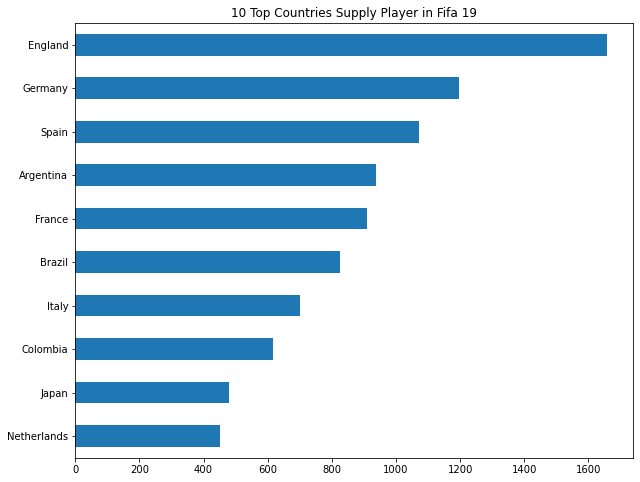

In [273]:
df_nationality[0:10].sort_values().plot(kind='barh', figsize=[10, 8], title='10 Top Countries Supply Player in Fifa 19')

### Histogram
   

In [296]:
df_nationality_top10 = df_nationality[0:10]
df_nationality_top10.head()

England      1657
Germany      1195
Spain        1071
Argentina     936
France        911
Name: Nationality, dtype: int64

In [275]:
top10_nationality = df_nationality_top10.index

In [276]:
df_top10 = df[df['Nationality'].isin(top10_nationality)]
df_top10.shape

(8840, 46)

No handles with labels found to put in legend.


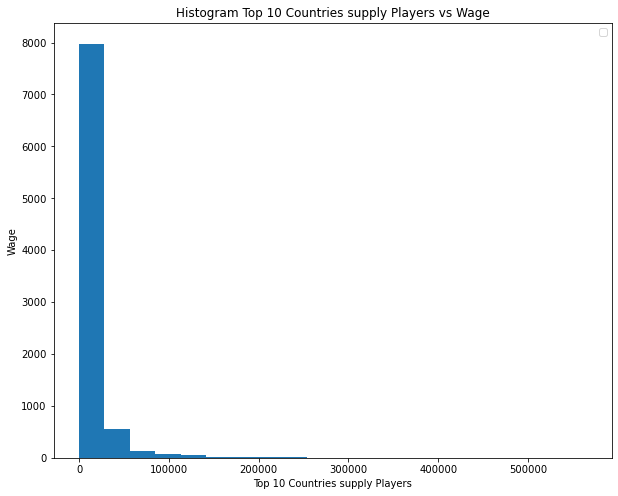

In [277]:
fig, ax = plt.subplots(figsize=[10, 8])
ax.hist(df_top10['Wage'], bins=20)

# Adding extra features   
plt.xlabel("Top 10 Countries supply Players")
plt.ylabel("Wage")
plt.legend()
plt.title('Histogram Top 10 Countries supply Players vs Wage')
plt.show()

### Pie Chart
    

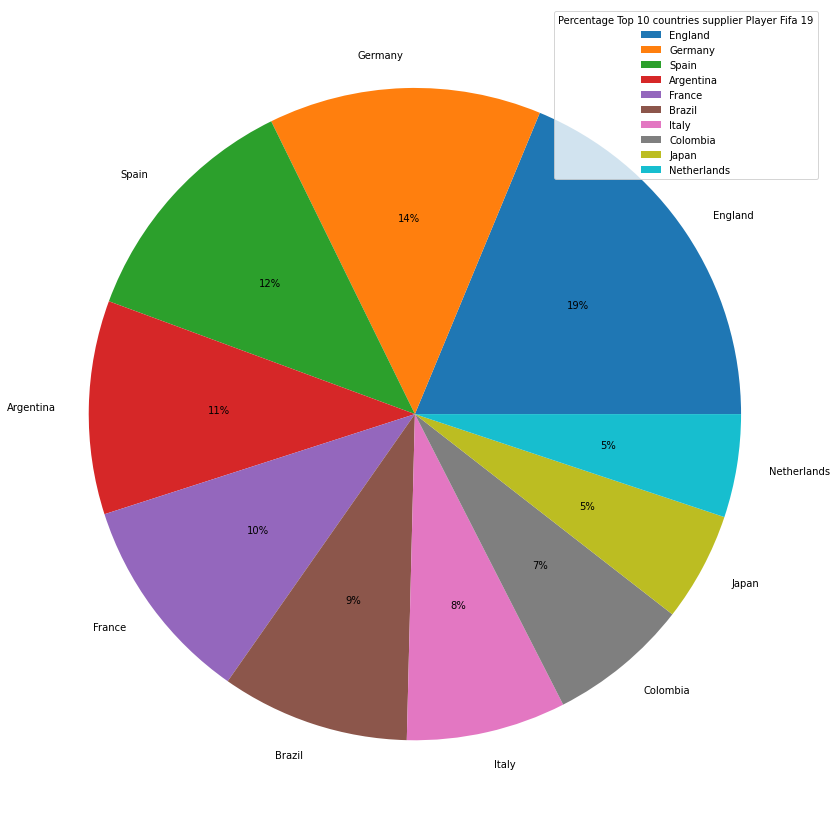

In [278]:
plt.figure(figsize=(15, 15))
plt.pie(df_nationality_top10, labels = top10_nationality, autopct='%1.0f%%')
plt.legend(title = "Percentage Top 10 countries supplier Player Fifa 19")
plt.show()


### Scatter Plot

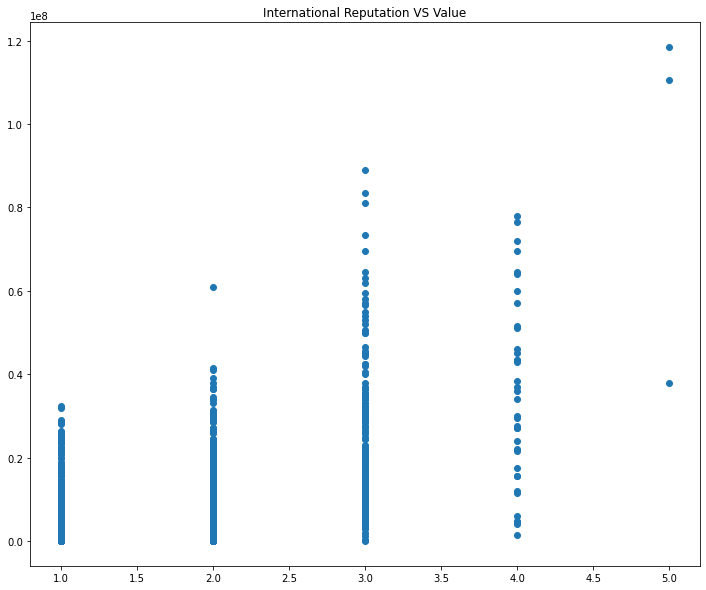

In [279]:
plt.figure(figsize=(12, 10))
x = df_top10['International Reputation']
y = df_top10['Value']
plt.scatter(x, y)
plt.title('International Reputation VS Value')
plt.show()

In [280]:
df_top10.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,International Reputation,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,110500000.0,565000.0,5.0,4.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
2,190871,Neymar Jr,26,Brazil,92,93,118500000.0,290000.0,5.0,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,72000000.0,260000.0,4.0,1.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
8,155862,Sergio Ramos,32,Spain,91,91,51000000.0,380000.0,4.0,3.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
11,182521,T. Kroos,28,Germany,90,90,76500000.0,355000.0,4.0,3.0,...,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0


### Box Plot
  

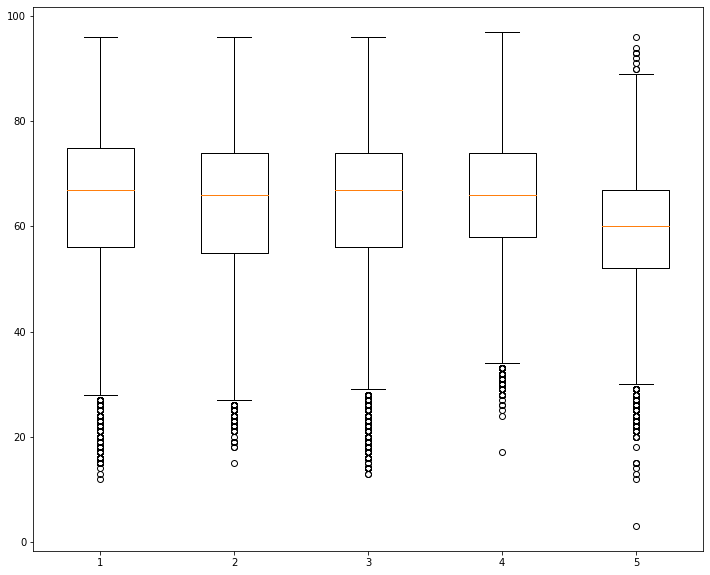

In [281]:
data = df_top10[['SprintSpeed', 'Agility', 'Stamina', 'Strength', 'Composure']]

plt.figure(figsize=(12, 10))

plt.boxplot(data)
plt.show()


### Maps dengan Folium

In [282]:

!pip install folium


In [283]:
import folium

In [284]:
# define the world map
world_map = folium.Map()

In [285]:
# display world map
world_map

In [286]:
latlong = pd.read_csv('https://raw.githubusercontent.com/google/dspl/master/samples/google/canonical/countries.csv')
latlong.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [287]:
countries = df_top10['Nationality'].unique()

In [288]:
countries[5] = 'United Kingdom'

In [289]:
countries

array(['Argentina', 'Brazil', 'Spain', 'Germany', 'France',
       'United Kingdom', 'Italy', 'Colombia', 'Netherlands', 'Japan'],
      dtype=object)

In [290]:
map_countries = latlong['name'].unique()

In [291]:
latlong['name'][5]

'Albania'

In [292]:
lat = []
long = []
for i in range(0, len(countries)):
    for j in range(0, len(map_countries)):
        if countries[i] == map_countries[j]:
            lat.append(latlong['latitude'][j])
            long.append(latlong['longitude'][j])

In [293]:
print(lat)
print(long)

[-38.416097, -14.235004, 40.463667, 51.165691, 46.227638, 55.378051, 41.87194, 4.570868, 52.132633, 36.204824]
[-63.616672, -51.92528, -3.74922, 10.451526, 2.213749, -3.435973, 12.56738, -74.297333, 5.291266, 138.252924]


In [294]:
d = {'latitude': lat, 'longitude': long, 'total': df_nationality[0:10]}
folium_data = pd.DataFrame(d)

In [295]:
folium_data

,latitude,longitude,total
England,-38.416097,-63.616672,1657
Germany,-14.235004,-51.925280,1195
Spain,40.463667,-3.749220,1071
Argentina,51.165691,10.451526,936
France,46.227638,2.213749,911
Brazil,55.378051,-3.435973,825
Italy,41.871940,12.567380,699
Colombia,4.570868,-74.297333,616
Japan,52.132633,5.291266,478
Netherlands,36.204824,138.252924,452
